In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from scipy.stats import ttest_ind


pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud = pd.read_csv('stud_math.xls')
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Посмотрим результаты функции describe()

In [2]:
stud.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


Видны столбцы с выбросами, им чуть позже мы уделим внимание: 
+ **Fedu** - в максимальном значении фигурирует `40`
+ **famrel** - с минимальным значением `-1`
+ **absences** - где аж 385 пропущенных часов в максимуме.

А пока уберем ненужный столбец **studytime, granular**

In [3]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

Посмотрим на общую информацию по таблице

In [4]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

Мы видим, что есть поля с пустыми значениями везде, кроме первых трёх столбцов.

# Посмотрим на переменные, которые содержит датасет

### Проанализируем переменную `school`

In [5]:
display(stud.loc[:, ['school']].describe())
display(pd.DataFrame(stud.school.value_counts()))

,school
count,395
unique,2
top,GP
freq,349


,school
GP,349
MS,46


Все записи заполнены, выбросов или отклонений нет.

### Проанализируем переменную `sex`

In [6]:
display(stud.loc[:, ['sex']].describe())
display(pd.DataFrame(stud.sex.value_counts()))

,sex
count,395
unique,2
top,F
freq,208


,sex
F,208
M,187


Все записи заполнены, выбросов или отклонений нет.

### Проанализируем переменную `age`

In [7]:
display(stud.loc[:, ['age']].describe())
display(pd.DataFrame(stud.age.value_counts()))

,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Все записи заполнены, выбросов или отклонений нет.

### Проанализируем переменную `address`

In [8]:
display(stud.loc[:, ['address']].describe())
display(pd.DataFrame(stud.address.value_counts()))
stud.address.sort_values().tail()

,address
count,378
unique,2
top,U
freq,295


,address
U,295
R,83


350    NaN
354    NaN
359    NaN
372    NaN
376    NaN
Name: address, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `famsize`

In [9]:
display(stud.loc[:, ['famsize']].describe())
display(pd.DataFrame(stud.famsize.value_counts()))
stud.famsize.sort_values().tail()

,famsize
count,368
unique,2
top,GT3
freq,261


,famsize
GT3,261
LE3,107


280    NaN
313    NaN
344    NaN
360    NaN
367    NaN
Name: famsize, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `Pstatus`

In [10]:
display(stud.loc[:, ['Pstatus']].describe())
display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.Pstatus.sort_values().tail()

,Pstatus
count,350
unique,2
top,T
freq,314


,Pstatus
T,314
A,36


313    NaN
333    NaN
342    NaN
357    NaN
364    NaN
Name: Pstatus, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `Medu`

In [11]:
display(stud.loc[:, ['Medu']].describe())
display(pd.DataFrame(stud.Medu.value_counts()))
stud.Medu.sort_values().tail()

,Medu
count,392.000000
mean,2.750000
std,1.098127
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


298    4.0
0      4.0
92     NaN
193    NaN
239    NaN
Name: Medu, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `Fedu`

In [12]:
display(stud.loc[:, ['Fedu']].describe())
display(pd.DataFrame(stud.Fedu.value_counts()))
stud.Fedu.sort_values().tail()

,Fedu
count,371.000000
mean,2.614555
std,2.228732
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,40.000000


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


290   NaN
310   NaN
328   NaN
349   NaN
374   NaN
Name: Fedu, dtype: float64

Во-первых, было выявлено наличие нескольких полей со значением `"NaN"`.

Во-вторых, есть один выброс со значением **`40`**. Поменяем это значение на `"None"`, чтобы оно не принимало участие при дальнейших рассчётах.

In [13]:
stud.Fedu = stud.Fedu.apply(lambda x: None if str(x).strip == '' else None if x > 4 else x)

In [14]:
stud.Fedu.sort_values()

76     0.0
171    0.0
394    1.0
149    1.0
292    1.0
      ... 
290    NaN
310    NaN
328    NaN
349    NaN
374    NaN
Name: Fedu, Length: 395, dtype: float64

In [15]:
display(stud.loc[:, ['Fedu']].describe())
display(pd.DataFrame(stud.Fedu.value_counts()))

,Fedu
count,370.000000
mean,2.513514
std,1.087540
min,0.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,4.000000


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


### Проанализируем переменную `Mjob`

In [16]:
display(stud.loc[:, ['Mjob']].describe())
display(pd.DataFrame(stud.Mjob.value_counts()))
stud.Mjob.sort_values().tail()

,Mjob
count,376
unique,5
top,other
freq,133


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32


265    NaN
268    NaN
277    NaN
291    NaN
337    NaN
Name: Mjob, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `Fjob`

In [17]:
display(stud.loc[:, ['Fjob']].describe())
display(pd.DataFrame(stud.Fjob.value_counts()))
stud.Fjob.sort_values().tail()

,Fjob
count,359
unique,5
top,other
freq,197


,Fjob
other,197
services,102
teacher,29
at_home,16
health,15


363    NaN
365    NaN
373    NaN
374    NaN
384    NaN
Name: Fjob, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `reason`

In [18]:
display(stud.loc[:, ['reason']].describe())
display(pd.DataFrame(stud.reason.value_counts()))
stud.reason.sort_values().tail()

,reason
count,378
unique,4
top,course
freq,137


,reason
course,137
home,104
reputation,103
other,34


335    NaN
363    NaN
373    NaN
382    NaN
394    NaN
Name: reason, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `guardian`

In [19]:
display(stud.loc[:, ['guardian']].describe())
display(pd.DataFrame(stud.guardian.value_counts()))
stud.guardian.sort_values().tail()

,guardian
count,364
unique,3
top,mother
freq,250


,guardian
mother,250
father,86
other,28


365    NaN
376    NaN
385    NaN
390    NaN
392    NaN
Name: guardian, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `traveltime`

In [20]:
display(stud.loc[:, ['traveltime']].describe())
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.traveltime.sort_values().tail()

,traveltime
count,367.000000
mean,1.438692
std,0.694181
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


348   NaN
372   NaN
384   NaN
385   NaN
389   NaN
Name: traveltime, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `studytime`

In [21]:
display(stud.loc[:, ['studytime']].describe())
display(pd.DataFrame(stud.studytime.value_counts()))
stud.studytime.sort_values().tail()

,studytime
count,388.000000
mean,2.038660
std,0.842078
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,4.000000


,studytime
2.0,194
1.0,103
3.0,64
4.0,27


112   NaN
129   NaN
227   NaN
266   NaN
314   NaN
Name: studytime, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `failures`

In [22]:
display(stud.loc[:, ['failures']].describe())
display(pd.DataFrame(stud.failures.value_counts()))
stud.failures.sort_values().tail()

,failures
count,373.000000
mean,0.337802
std,0.743135
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


,failures
0.0,293
1.0,49
2.0,16
3.0,15


261   NaN
280   NaN
313   NaN
320   NaN
344   NaN
Name: failures, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `schoolsup`

In [23]:
display(stud.loc[:, ['schoolsup']].describe())
display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.schoolsup.sort_values().tail()

,schoolsup
count,386
unique,2
top,no
freq,335


,schoolsup
no,335
yes,51


211    NaN
274    NaN
321    NaN
392    NaN
394    NaN
Name: schoolsup, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `famsup`

In [24]:
display(stud.loc[:, ['famsup']].describe())
display(pd.DataFrame(stud.famsup.value_counts()))
stud.famsup.sort_values().tail()

,famsup
count,356
unique,2
top,yes
freq,219


,famsup
yes,219
no,137


313    NaN
327    NaN
328    NaN
335    NaN
363    NaN
Name: famsup, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `paid`

In [25]:
display(stud.loc[:, ['paid']].describe())
display(pd.DataFrame(stud.paid.value_counts()))
stud.paid.sort_values().tail()

,paid
count,355
unique,2
top,no
freq,200


,paid
no,200
yes,155


319    NaN
341    NaN
356    NaN
371    NaN
384    NaN
Name: paid, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `activities`

In [26]:
display(stud.loc[:, ['activities']].describe())
display(pd.DataFrame(stud.activities.value_counts()))
stud.activities.sort_values().tail()

,activities
count,381
unique,2
top,yes
freq,195


,activities
yes,195
no,186


160    NaN
163    NaN
207    NaN
212    NaN
393    NaN
Name: activities, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `nursery`

In [27]:
display(stud.loc[:, ['nursery']].describe())
display(pd.DataFrame(stud.nursery.value_counts()))
stud.nursery.sort_values().tail()

,nursery
count,379
unique,2
top,yes
freq,300


,nursery
yes,300
no,79


341    NaN
350    NaN
359    NaN
365    NaN
383    NaN
Name: nursery, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `higher`

In [28]:
display(stud.loc[:, ['higher']].describe())
display(pd.DataFrame(stud.higher.value_counts()))
stud.higher.sort_values().tail()

,higher
count,375
unique,2
top,yes
freq,356


,higher
yes,356
no,19


331    NaN
347    NaN
362    NaN
382    NaN
392    NaN
Name: higher, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `internet`

In [29]:
display(stud.loc[:, ['internet']].describe())
display(pd.DataFrame(stud.internet.value_counts()))
stud.internet.sort_values().tail()

,internet
count,361
unique,2
top,yes
freq,305


,internet
yes,305
no,56


333    NaN
340    NaN
384    NaN
385    NaN
389    NaN
Name: internet, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `romantic`

In [30]:
display(stud.loc[:, ['romantic']].describe())
display(pd.DataFrame(stud.romantic.value_counts()))
stud.romantic.sort_values().tail()

,romantic
count,364
unique,2
top,no
freq,240


,romantic
no,240
yes,124


339    NaN
342    NaN
372    NaN
373    NaN
380    NaN
Name: romantic, dtype: object

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `famrel`

In [31]:
display(stud.loc[:, ['famrel']].describe())
stud.famrel.sort_values().tail()

,famrel
count,368.000000
mean,3.937500
std,0.927277
min,-1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


348   NaN
349   NaN
355   NaN
360   NaN
373   NaN
Name: famrel, dtype: float64

Во-первых, было выявлено наличие полей со значением `"NaN"`.

Во-вторых, есть один выброс со значением **`-1`**. Поменяем это значение на `"None"`, чтобы оно не принимало участие в рассчётах.

In [32]:
stud.famrel = stud.famrel.apply(lambda x: None if str(x).strip == '' else None if x < 0 else x)

### Проанализируем переменную `freetime`

In [33]:
display(stud.loc[:, ['freetime']].describe())
stud.freetime.sort_values().tail()

,freetime
count,384.000000
mean,3.231771
std,0.993940
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


290   NaN
291   NaN
311   NaN
314   NaN
338   NaN
Name: freetime, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `goout`

In [34]:
display(stud.loc[:, ['goout']].describe())
stud.goout.sort_values().tail()

,goout
count,387.000000
mean,3.105943
std,1.115896
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


202   NaN
221   NaN
241   NaN
312   NaN
322   NaN
Name: goout, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `health`

In [35]:
display(stud.loc[:, ['health']].describe())
stud.health.sort_values().tail()

,health
count,380.000000
mean,3.531579
std,1.396019
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


256   NaN
259   NaN
266   NaN
330   NaN
342   NaN
Name: health, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`.

### Проанализируем переменную `absences`

In [36]:
display(stud.loc[:, ['absences']].describe())
display(stud.absences.sort_values(ascending=False).head(15))
stud.absences.sort_values().tail()

,absences
count,383.000000
mean,7.279373
std,23.465197
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


222    385.0
390    212.0
276     75.0
183     56.0
74      54.0
315     40.0
307     38.0
280     30.0
205     28.0
103     26.0
40      25.0
198     24.0
320     23.0
277     22.0
216     22.0
Name: absences, dtype: float64

227   NaN
254   NaN
265   NaN
270   NaN
352   NaN
Name: absences, dtype: float64

Было выявлено наличие нескольких полей со значением `"NaN"`.

Посмотрим на гистограмму, потому что у меня есть подозрения на наличие выбросов.

<AxesSubplot:ylabel='Frequency'>

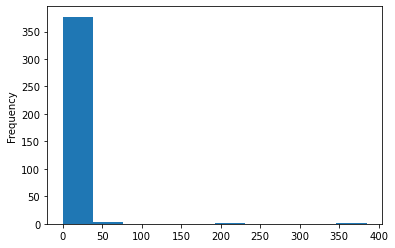

In [37]:
stud.absences.plot(kind='hist')

25-й перцентиль: 0.0,
75-й перцентиль: 8.0,
IQR: 8.0, 
Границы выбросов: [-12.0, 20.0].


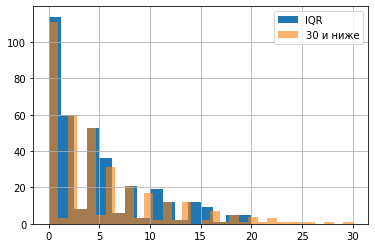

In [38]:
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    'IQR: {}, '.format(IQR),
    'Границы выбросов: [{f}, {l}].'.format(
        f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR),
    sep='\n')

stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=16, range=(0, 20), label='IQR')
stud.absences.loc[stud.absences <= 100].hist(bins=32, range=(0, 30), label='30 и ниже', alpha=0.6)

plt.legend()

Действительно, есть значения, которые уходят далеко за пределы межквартильного диапазона. Я решил убрать из расчёта все значения выше 30 (не захотел останавливаться на 20 и включил еще 10 значений).

In [39]:
stud.absences = stud.absences.apply(lambda x: None if x > 30 else x)

### Проанализируем переменную `score`

In [40]:
display(stud.loc[:, ['score']].describe())
stud.score.sort_values().tail()

,score
count,389.000000
mean,52.262211
std,22.919022
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


244   NaN
270   NaN
283   NaN
312   NaN
350   NaN
Name: score, dtype: float64

Значения без отклонений.
Было выявлено наличие нескольких полей со значением `"NaN"`. Уберём их из нашего набора.

In [41]:
stud = stud[stud.score >= 0]

## Переходим к анализу числовых переменных

Начнём с того, что посмотрим, как коррелируют между собой числовые столбцы.

Для быстрого построения графиков зависимости переменных воспользуемся функцией pairplot из модуля seaborn.

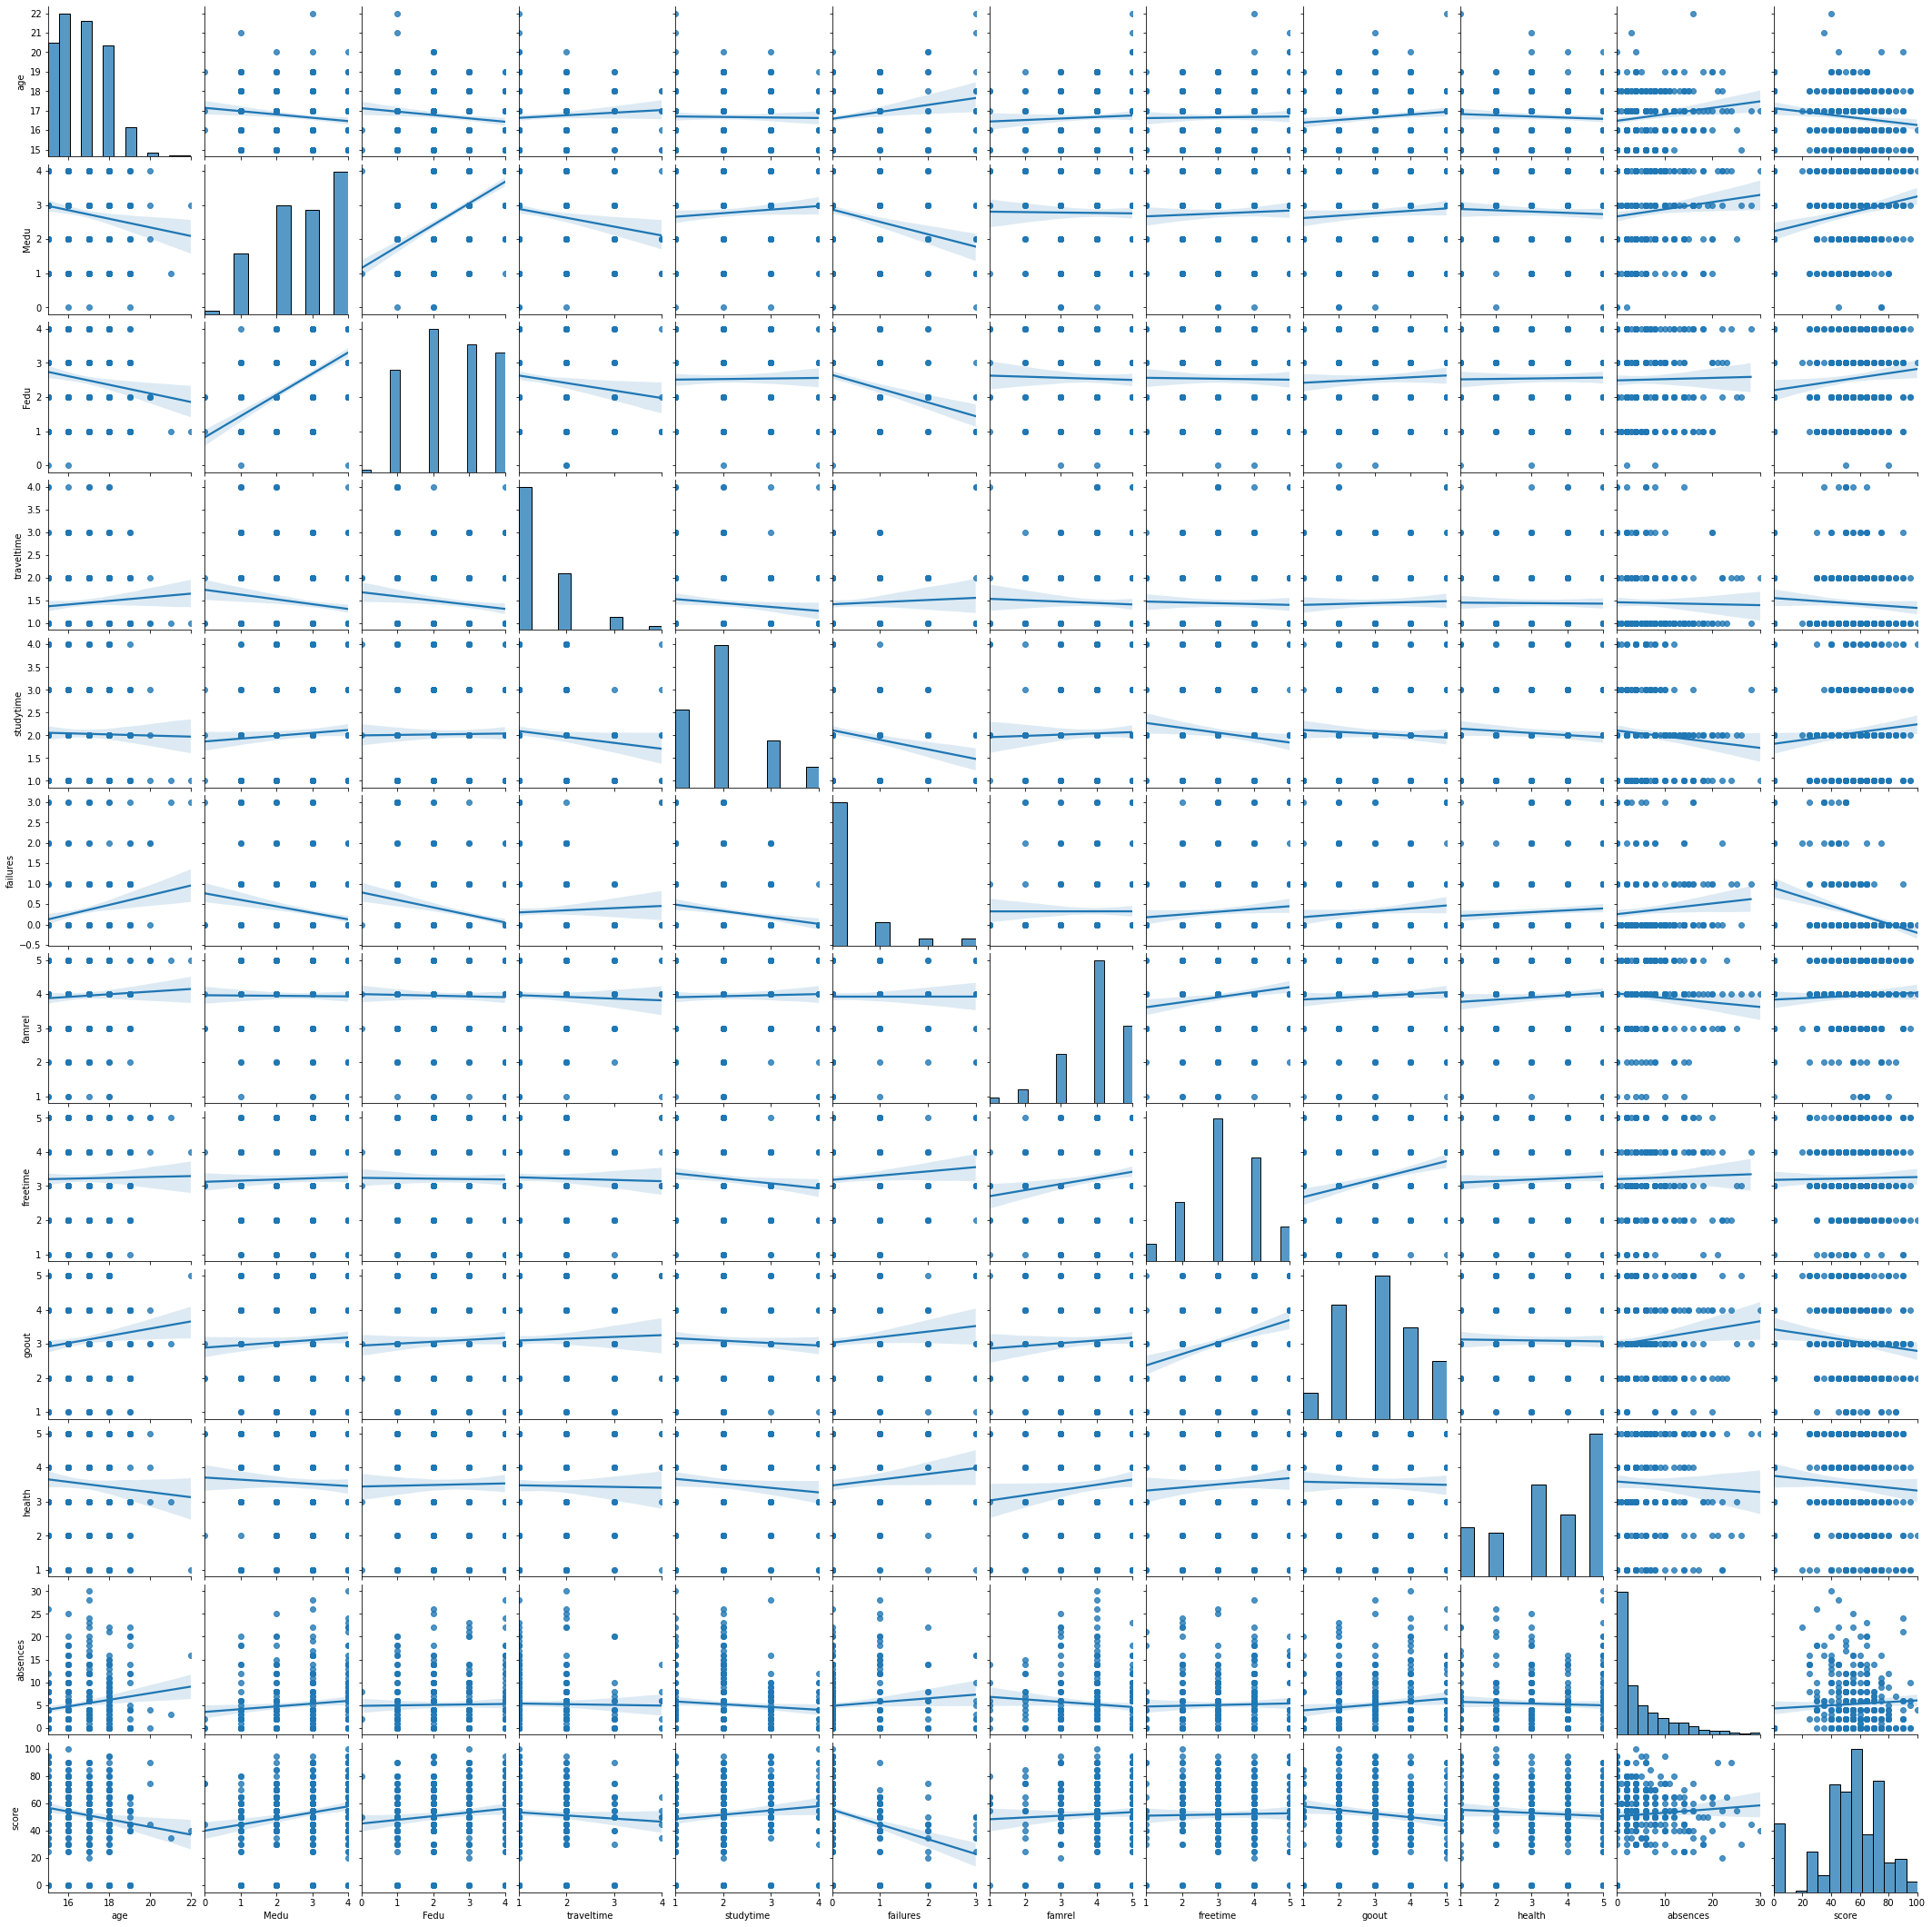

In [42]:
sns.pairplot(stud, kind='reg');

Начнём с того, что посмотрим, как коррелируют между собой числовые столбцы.

In [43]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.147952,0.073146,-0.018227,0.205919,0.054846,0.016099,0.121115,-0.068103,0.155755,-0.155726
Medu,-0.146736,1.000000,0.626536,-0.165838,0.081032,-0.240319,-0.010205,0.038265,0.072320,-0.048331,0.112917,0.213349
Fedu,-0.147952,0.626536,1.000000,-0.142170,0.013009,-0.272352,-0.026481,-0.012749,0.054938,0.017321,0.019474,0.130002
traveltime,0.073146,-0.165838,-0.142170,1.000000,-0.105910,0.049738,-0.039304,-0.026299,0.032629,-0.011724,-0.018145,-0.070559
studytime,-0.018227,0.081032,0.013009,-0.105910,1.000000,-0.181947,0.029253,-0.125066,-0.053831,-0.079180,-0.087963,0.115741
failures,0.205919,-0.240319,-0.272352,0.049738,-0.181947,1.000000,0.000506,0.091608,0.107747,0.088013,0.104068,-0.344338
famrel,0.054846,-0.010205,-0.026481,-0.039304,0.029253,0.000506,1.000000,0.162715,0.064314,0.100807,-0.085845,0.051219
freetime,0.016099,0.038265,-0.012749,-0.026299,-0.125066,0.091608,0.162715,1.000000,0.296338,0.064315,0.029331,0.019026
goout,0.121115,0.072320,0.054938,0.032629,-0.053831,0.107747,0.064314,0.296338,1.000000,-0.018026,0.122132,-0.129685
health,-0.068103,-0.048331,0.017321,-0.011724,-0.079180,0.088013,0.100807,0.064315,-0.018026,1.000000,-0.043872,-0.070460


Из корреляций, мы можем наблюдать следующее:
1. Есть небольшая обратная корреляция от возраста: чем старше ученик, тем больше учёба уходит на второй план.
2. Наблюдается положительная зависимость от образования родителей, чем больше образованы - тем сильнее это сказывается на успеваемости ребенка, то есть чаще звучит фраза: "да меня в твои годы пока домашку не сделаю, на ужин не приглашали"
3. Чем дальше от школы, тем больше времени уходит на дорогу и, похоже, тем меньше сил остаётся на учёбу. Но корреляция не сильная, однако свою каплю привносит.
4. Зависимость от времени обучения - ничего удивительного, чем больше за уроками, тем выше результат. Но показатель не впечатляющий, не ключевой, и это странно. Возможно родители привирают или ученики делают вид, что занимаются, а сами в ТикТоке сидят.
5. И обратная зависимость к внеучебным неудачам. То есть чем больше поражений вне учебного процесса, тем меньше тяга к обучению.
6. Присутствует лёгкий намёк на зависимость от отношений в семье.
7. Практически никак не влияет наличие свободного времени на результат.
8. Зато даёт обратную зависимость проведение времени с друзьями. Именно они учат всему "плохому" и как правильно прогуливать школу.
9. Отрицательная корреляция со здоровьем идёт в разрез со здравым смыслом. Возможно, учителя идут навстречу дохлячкам...
10. Тоже самое с пропущенными занятиями, странно видеть зависимость от кол-ва пропущенных часов. Возможно, отсутсвующим хулиганам домашку делают отличники и зубрилы. Либо дирекция школы "влияет" на общую оценку, чтобы школы не теряли свой рейтинг.

Вывод: сильным влиянием на успеваемость ученика оказывают следующие показатели (столбцы):
* age
* Medu
* Fedu
* failures
* goout

Но не стоит зацикливаться только на этих, нужно в том числе уделять внимание и менее важным факторам.

## Переходим к анализу номинативных переменных

Ниже идет список этих колонок.

In [44]:
columns = stud.describe(include='object').columns
columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [45]:
def draw_boxplot(column):
    fig, ax = plt.subplots(figsize=(8, 10))
    sns.boxplot(x=column, y='score', data=stud, ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

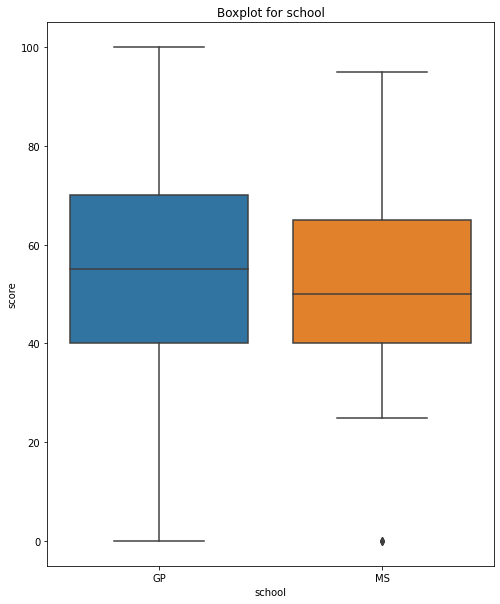

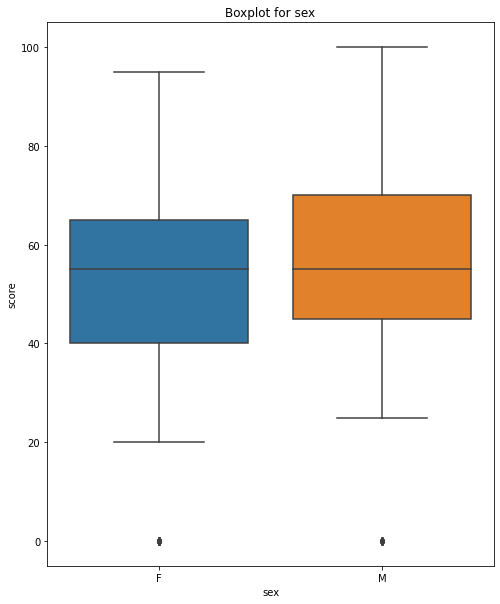

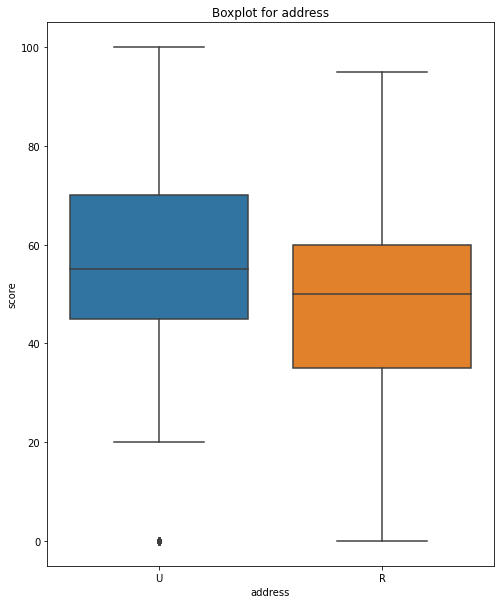

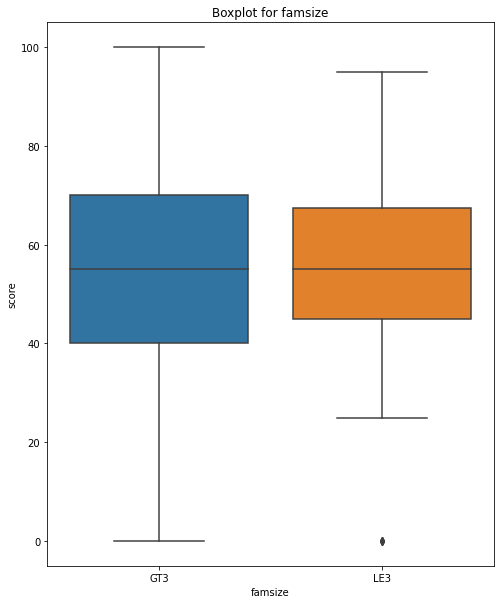

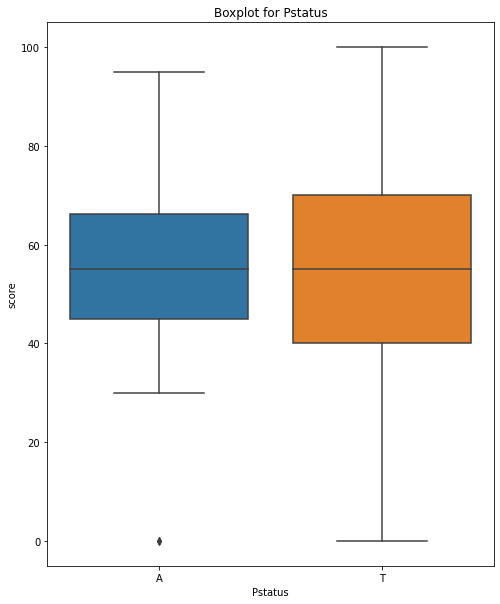

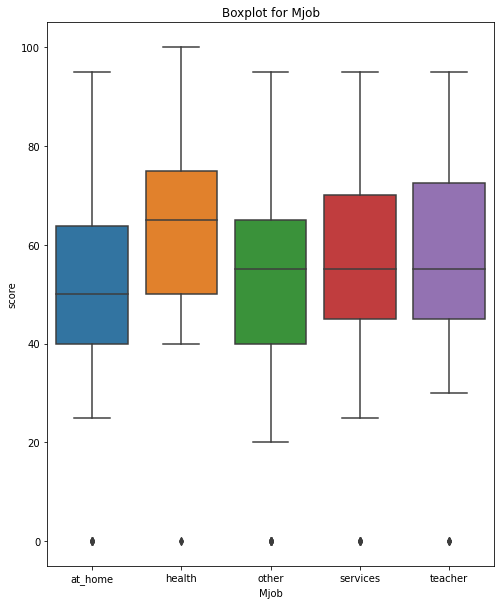

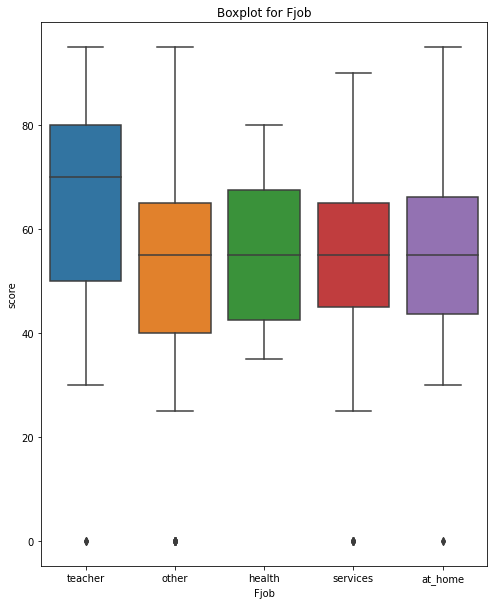

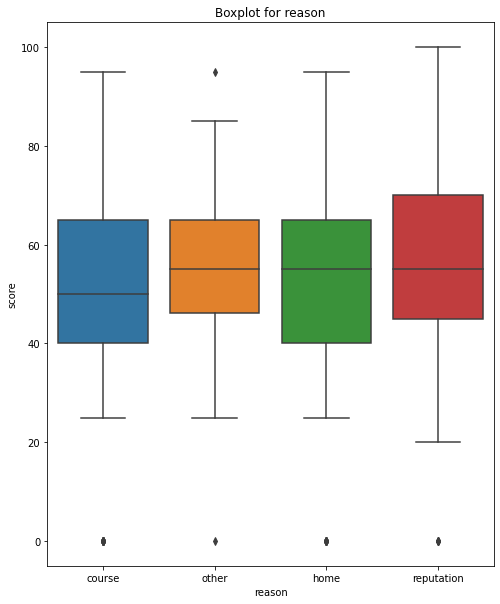

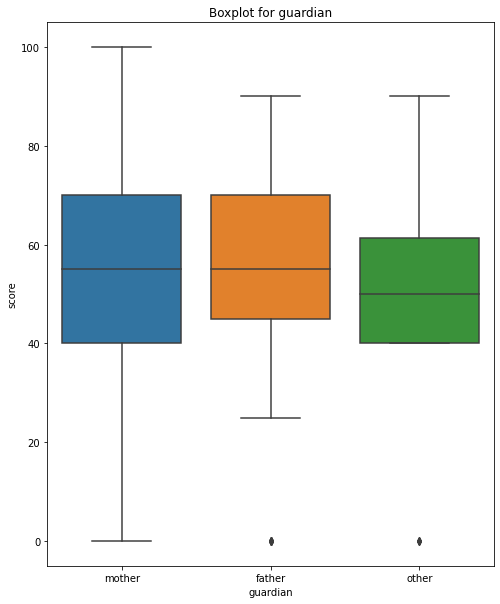

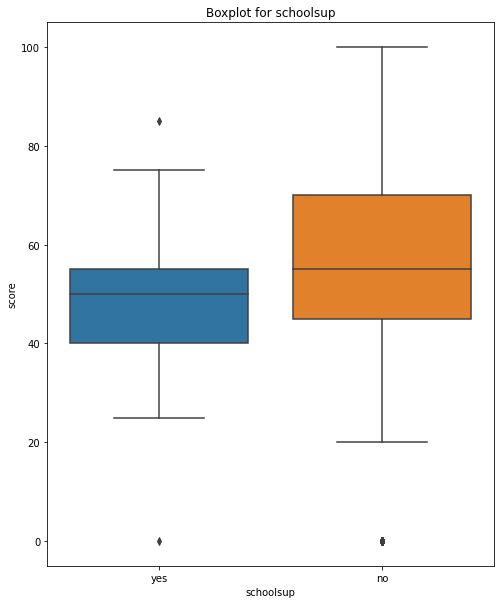

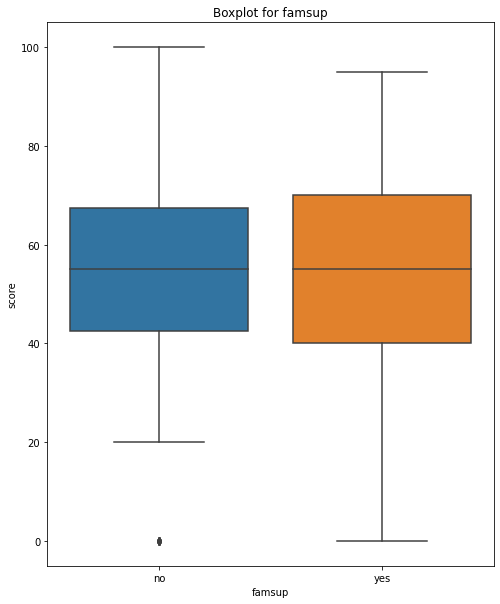

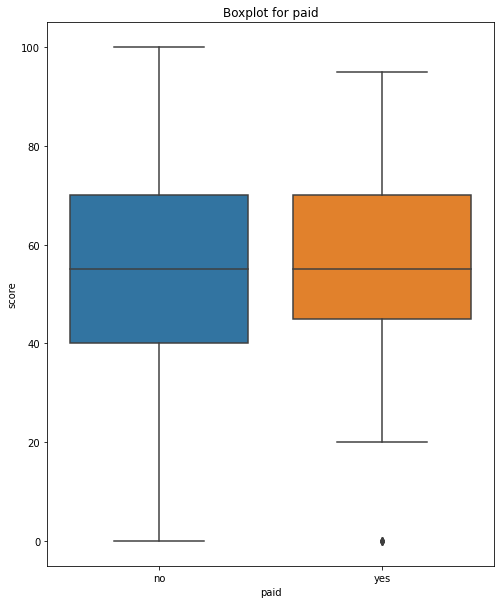

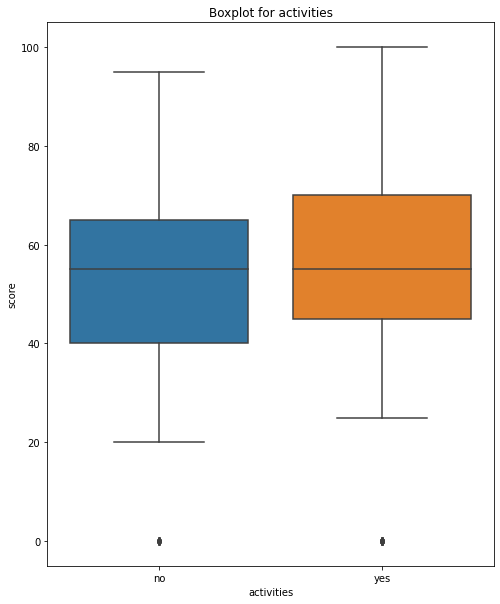

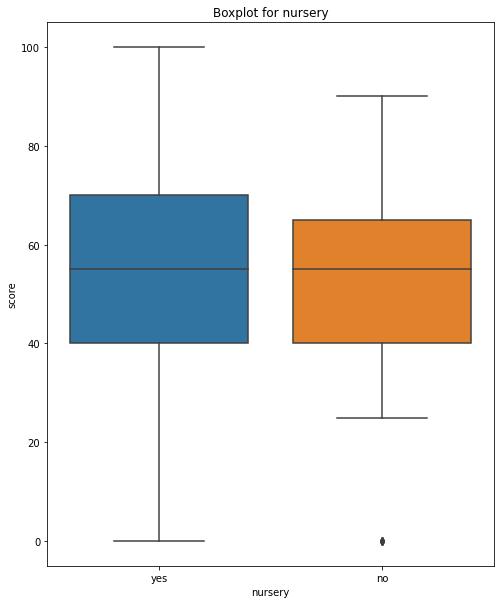

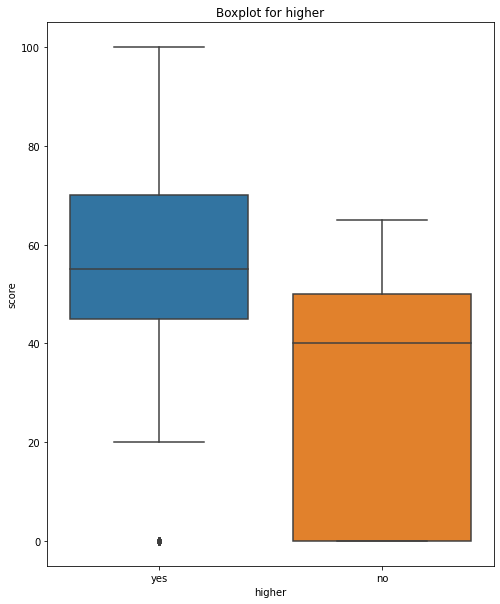

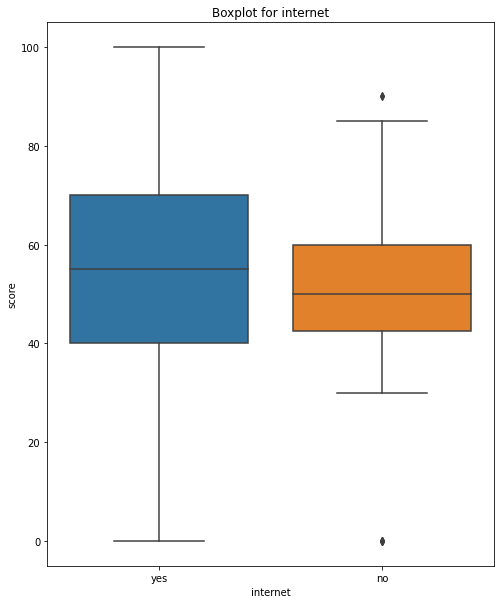

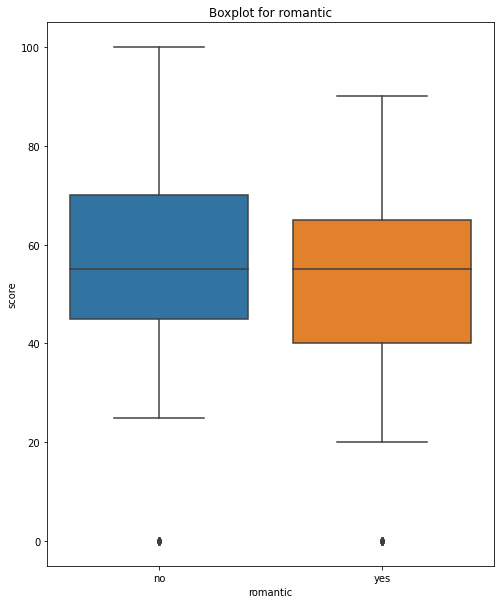

In [46]:
for col in columns:
    draw_boxplot(col)

По графикам в глаза бросилась зависимость от работы родителей, а также желание ребенка получить высшее образование (Mjob, Fjob, higher). Теперь посмотрим на эти данные со стороны статистики и проведём тест Стьюдента.
Так как уникальных значений в столбцах немного, будем рассматривать все варианты.

In [47]:
def calc_stat_diff(column):
    pairs = list(combinations(stud[column].value_counts().index, 2))
    for pair in pairs:
        pval = ttest_ind(stud[stud[column] == pair[0]]['score'],
                         stud[stud[column] == pair[1]]['score']).pvalue
        if pval <= 0.05/len(pairs):
            print('Найдены статистически значимые различия для колонки', column)
            print(pair)
            print('pvalue', pval, '\n'*3)
            break

In [48]:
for col in columns:
    calc_stat_diff(col)

Найдены статистически значимые различия для колонки address
('U', 'R')
pvalue 0.020199635381958233 



Найдены статистически значимые различия для колонки Mjob
('at_home', 'health')
pvalue 0.00422182882401537 



Найдены статистически значимые различия для колонки higher
('yes', 'no')
pvalue 0.0003388477332989921 



Найдены статистически значимые различия для колонки romantic
('no', 'yes')
pvalue 0.007406360719202365 





# Тест из любопытства

Как будет выглядеть значение корреляции, если мы заменим у числовых признаков их значения на числа.

In [49]:
# Состоит в романтических отношениях - тогда значение равно 1, а если нет - нулю.
stud.romantic = stud.romantic.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

# Стремится получить высшее образование, тогда 1, если нет - 0.
stud.higher = stud.higher.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

# Живет в городе - 1, или за его пределами - 0
stud.address = stud.address.apply(lambda x: 1 if x == 'U' else 0 if x == 'R' else x)

In [50]:
stud[['higher', 'address', 'romantic', 'score']].corr()

,higher,address,romantic,score
higher,1.000000,0.051472,-0.130752,0.185563
address,0.051472,1.000000,-0.009740,0.120067
romantic,-0.130752,-0.009740,1.000000,-0.141320
score,0.185563,0.120067,-0.141320,1.000000


Действительно, прослеживается ощутимая связь между параметрами. Посмотрим на другие показатели, которые мне показались интересными.

Во-первых, насколько результат зависит от школы?

In [51]:
stud.school = stud.school.apply(lambda x: 1 if x == 'GP' else 0 if x == 'MS' else x)

In [52]:
stud[['score', 'school']].corr()

,score,school
score,1.000000,0.044524
school,0.044524,1.000000


Не особо ощутимая связь...
А есть ли зависимость от дополнительных платных занятий?

In [53]:
stud.paid = stud.paid.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

In [54]:
stud[['score', 'paid']].corr()

,score,paid
score,1.000000,0.099878
paid,0.099878,1.000000


Какую-то пользу дополнительные занятия приносят, но не настолько ощутимую, чтобы за неё хвататься.
Посмотрим на размер семьи.

In [55]:
stud.famsize = stud.famsize.apply(lambda x: 1 if x == 'GT3' else 0 if x == 'LE3' else x)

In [56]:
stud[['score', 'famsize']].corr()

,score,famsize
score,1.000000,-0.063324
famsize,-0.063324,1.000000


Несущественная обратная связь, логично, больше народу в доме - больше шума.
И напоследок посмотрим на поддержку.

In [57]:
stud.schoolsup = stud.schoolsup.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)
stud.famsup = stud.famsup.apply(lambda x: 1 if x == 'yes' else 0 if x == 'no' else x)

In [58]:
stud[['score', 'schoolsup', 'famsup']].corr()

,score,schoolsup,famsup
score,1.00000,-0.088650,-0.007540
schoolsup,-0.08865,1.000000,0.093237
famsup,-0.00754,0.093237,1.000000


Семейная поддержка на результат в тестах не влияет, но дополнительная образовательная поддержка кое-какое влияение оказывает.

# Вывод и итог

Из проделанного анализа можно заключить следующее: факторы первого уровня, то есть те, которые напрямую влияют на успеваемость ученика это:
+ address
+ Mjob
+ higher
+ romantic
+ age
+ Medu
+ Fedu
+ failures
+ goout

Но в том числе есть показатели, которые на данный момент не сильно скоррелированы с итоговым показателем по математике, но возможно они растут со временем и за ними нужно периодически поглядывать, это:
- studytime
- schoolsup
- paid